In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

#sc.settings.set_figure_params(dpi=80)
%matplotlib inline 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sc.set_figure_params(scanpy=True, fontsize=14 )
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

In [6]:
import loompy as lp
import pandas as pd

In [7]:
lf = lp.connect("RPE_mel_pyscenic_output.loom",  validate=False , mode='r+')

In [8]:
lf

,,CellID,AAACCTGAGCAAATCA-1,AAACCTGAGCGTTTAC-1,AAACCTGAGCTAAACA-1,AAACCTGAGCTCCTCT-1,AAACCTGAGCTTTGGT-1,AAACCTGAGGCATGTG-1,AAACCTGAGGTAAACT-1,AAACCTGAGTCTCCTC-1,AAACCTGCAACTTGAC-1,AAACCTGCAAGAGGCT-1,...
,,RegulonsAUC,"(0.02159502, 0., 0., 0., 0., 0.01508612, 0.045511, 0.03977373, 0.01289698, 0., 0.13698075, 0.0006079, 0., 0.14650456, 0.01365018, 0.02224167, 0.01651041, 0., 0.01497516, 0.01204605, 0., 0.0356563, 0., 0.01397068, 0.02804961, 0., 0.0693249, 0., 0.01886541, 0.04858449, 0.07021258, 0.03351064, 0., 0.02045354, 0.00512665, 0.04727117, 0.02524787, 0., 0.01699389, 0., 0., 0.02140192, 0., 0.01535588, 0., 0., 0.01726089, 0., 0.00284085, 0.03101508, 0.01168436, 0.02132992, 0., 0., 0.01547389, 0., 0.05336009, 0.00761972, 0.01003238, 0.01692371, 0.02015085, 0.00424878, 0., 0., 0., 0.01159798, 0., 0., 0.00121775, 0.01539719, 0.01034176, 0.01908139, 0.03910941, 0.01074733, 0., 0.01687774, 0., 0.01121328, 0.01097501, 0.01014037, 0.00854185, 0.03730336, 0.19985904, 0.02315353, 0.01957619, 0.01473187, 0.02658435, 0., 0., 0.00111449, 0.02563323, 0., 0., 0.00347747, 0., 0.00068458, 0., 0.00462732, 0.01902262, 0.02493196, 0., 0., 0.01098901, 0.01187662, 0.01229461, 0.01977728, 0.01128127, 0., 0.0238382, 0., 0.04675523, 0., 0.02640205, 0.01500175, 0.0131576, 0.1845998, 0.00545325, 0.23955871, 0.05415226, 0.01303531, 0., 0.00382362, 0., 0.04660588, 0.0285613, 0.00942752, 0.01655253, 0., 0.02806636, 0.02777778, 0.03432959, 0.01444276, 0.01296129, 0.00836572, 0.0533643, 0.0209595, 0.02395002, 0.03578887, 0.0160233, 0., 0.07436932, 0.05954832, 0.06149838, 0.01592765, 0.00976987, 0.00365232, 0.02399873, 0.06512151, 0.03056304, 0.04514634, 0.03695212, 0.03875837, 0.03603481, 0.05308357, 0., 0.1260924, 0.02520924, 0.01300236, 0.00895747, 0., 0., 0.04275377, 0.0246289, 0.00735199, 0.01408698, 0.03300043, 0.01086946, 0.0463164, 0.04612807, 0.02343509, 0.01942347, 0.06831073, 0.01913595, 0.01980539, 0., 0.01413263, 0.01756163, 0., 0., 0.0457259, 0., 0.00458386, 0., 0., 0., 0.02014281, 0., 0., 0., 0.02592747, 0.01998382, 0.02345384, 0.02969235, 0.04755998, 0.02325196, 0.01382267, 0.01429822, 0., 0.01108937, 0., 0., 0.03352114, 0.00976631, 0.0236434, 0.01621074, 0.01004728, 0.00615408, 0., 0., 0.01510751, 0.03211884, 0.00474743, 0.0154002, 0., 0.0349402, 0., 0.0114515, 0.03350702, 0.01201332, 0.04179331, 0.05065856, 0.02623133, 0., 0., 0.00520528, 0.02806791, 0.02267612, 0.03546099, 0.01158222, 0.02979186, 0.00827835, 0., 0., 0.04167898, 0.02815397, 0.02923502, 0., 0.06717325, 0., 0., 0., 0.00453476, 0., 0.06240767, 0.02228232, 0.01248928, 0.03429722, 0.00263425, 0.00722435, 0.04307725, 0., 0., 0.0257862, 0.01090926, 0., 0.01343325, 0.10831434, 0., 0.0055561, 0., 0., 0., 0.06275329, 0.09063277, 0.07061556, 0.0065627, 0., 0.02240586, 0.00604737, 0.01896267, 0.00998311, 0.06068514, 0.0336165, 0.07788484, 0.0181435, 0.01814261, 0.02163929, 0.02072789, 0.01945289, 0.01494428, 0., 0.01671312, 0.00160471, 0., 0.02488764, 0.19891928, 0.0121862, 0.01428811, 0.04732354, 0.01075891, 0.00887398, 0.06236632, 0.0613005, 0., 0., 0., 0.03029033, 0., 0., 0., 0., 0.11469098, 0., 0., 0.01144924, 0.04452108, 0., 0.09888551, 0., 0.05594939, 0.01386597, 0.04881984, 0.02645258, 0.01852409, 0.04033527, 0.0100439, 0.00601366, 0.01430846, 0.03198093, 0., 0., 0.01754628, 0.0052731, 0., 0.01846026, 0.003802, 0.00506586, 0.03485309, 0.04013284, 0.02111624, 0.00812788, 0., 0.15440729, 0., 0.00615502, 0., 0.0067, 0.01133152, 0.12568952, 0., 0.042136, 0.01090649, 0., 0.00569909, 0., 0.01519757, 0.01470546, 0., 0., 0., 0., 0.12462006, 0., 0., 0.02452318, 0., 0., 0., 0., 0.01846371, 0., 0., 0., 0., 0., 0.02955314, 0., 0., 0.01642036, 0.09945964, 0., 0., 0., 0.10422999, 0., 0., 0.01920804, 0.0457715, 0., 0., 0., 0., 0., 0., 0., 0.01859306, 0.)","(0.00199739, 0.01421606, 0.02457261, 0., 0.00855863, 0.01702128, 0.04725954, 0.04197899, 0.01184572, 0., 0., 0.08794326, 0., 0.10728036, 0.01580547, 0.03708976, 0.02917933, 0.02974381, 0.01218277, 0.01501937, 0.02079764, 0.01141343, 0.00

In [9]:
lf.ca.CellID

array(['AAACCTGAGCAAATCA-1', 'AAACCTGAGCGTTTAC-1', 'AAACCTGAGCTAAACA-1',
       ..., 'TTTGTCATCGGAAACG-1', 'TTTGTCATCTTGACGA-1',
       'TTTGTCATCTTGCCGT-1'], dtype=object)

In [10]:
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

In [11]:
auc_mtx

,2610021A01Rik(+),Aebp2(+),Ahdc1(+),Ahr(+),Alx3(+),Alx4(+),Arid3a(+),Arid5b(+),Arnt(+),Arntl(+),...,Zfp91(+),Zfp93(+),Zfp947(+),Zfp955a(+),Zfp991(+),Zik1(+),Zkscan7(+),Zscan2(+),Zscan21(+),Zxdc(+)
AAACCTGAGCAAATCA-1,0.021595,0.000000,0.000000,0.0,0.000000,0.015086,0.045511,0.039774,0.012897,0.0,...,0.045772,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.018593,0.000000
AAACCTGAGCGTTTAC-1,0.001997,0.014216,0.024573,0.0,0.008559,0.017021,0.047260,0.041979,0.011846,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.074721,0.001140,0.041814,0.007805
AAACCTGAGCTAAACA-1,0.007526,0.000000,0.000000,0.0,0.061883,0.038490,0.019659,0.080631,0.008418,0.0,...,0.000000,0.164359,0.049916,0.014269,0.0,0.00000,0.000000,0.103090,0.020647,0.011970
AAACCTGAGCTCCTCT-1,0.000000,0.000823,0.012530,0.0,0.061297,0.049828,0.031539,0.082964,0.036703,0.0,...,0.038322,0.183046,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.008105,0.000000
AAACCTGAGCTTTGGT-1,0.040701,0.015261,0.008028,0.0,0.000000,0.027690,0.027037,0.071798,0.019441,0.0,...,0.019727,0.100642,0.002702,0.000000,0.0,0.00000,0.116261,0.000000,0.010570,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCACGTTC-1,0.071183,0.008834,0.020494,0.0,0.021783,0.039777,0.034350,0.096122,0.079279,0.0,...,0.000000,0.000000,0.054238,0.057666,0.0,0.02381,0.008105,0.000000,0.009967,0.000000
TTTGTCATCGCGCCAA-1,0.010334,0.011525,0.026150,0.0,0.040980,0.037508,0.023965,0.089307,0.021223,0.0,...,0.000656,0.178206,0.015941,0.000000,0.0,0.00000,0.073961,0.000000,0.000000,0.017299
TTTGTCATCGGAAACG-1,0.031090,0.000000,0.027856,0.0,0.038874,0.029260,0.036229,0.089829,0.035629,0.0,...,0.000000,0.110661,0.000000,0.015451,0.0,0.00000,0.000000,0.000000,0.003149,0.000000
TTTGTCATCTTGACGA-1,0.027327,0.018459,0.028946,0.0,0.084946,0.042938,0.022085,0.086881,0.029671,0.0,...,0.022230,0.110098,0.034178,0.000000,0.0,0.00000,0.184397,0.084980,0.000000,0.000000


In [12]:
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)
regulons = lf.ra.Regulons

In [13]:
auc_mtx

,2610021A01Rik(+),Aebp2(+),Ahdc1(+),Ahr(+),Alx3(+),Alx4(+),Arid3a(+),Arid5b(+),Arnt(+),Arntl(+),...,Zfp91(+),Zfp93(+),Zfp947(+),Zfp955a(+),Zfp991(+),Zik1(+),Zkscan7(+),Zscan2(+),Zscan21(+),Zxdc(+)
AAACCTGAGCAAATCA-1,0.021595,0.000000,0.000000,0.0,0.000000,0.015086,0.045511,0.039774,0.012897,0.0,...,0.045772,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.018593,0.000000
AAACCTGAGCGTTTAC-1,0.001997,0.014216,0.024573,0.0,0.008559,0.017021,0.047260,0.041979,0.011846,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.074721,0.001140,0.041814,0.007805
AAACCTGAGCTAAACA-1,0.007526,0.000000,0.000000,0.0,0.061883,0.038490,0.019659,0.080631,0.008418,0.0,...,0.000000,0.164359,0.049916,0.014269,0.0,0.00000,0.000000,0.103090,0.020647,0.011970
AAACCTGAGCTCCTCT-1,0.000000,0.000823,0.012530,0.0,0.061297,0.049828,0.031539,0.082964,0.036703,0.0,...,0.038322,0.183046,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.008105,0.000000
AAACCTGAGCTTTGGT-1,0.040701,0.015261,0.008028,0.0,0.000000,0.027690,0.027037,0.071798,0.019441,0.0,...,0.019727,0.100642,0.002702,0.000000,0.0,0.00000,0.116261,0.000000,0.010570,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCACGTTC-1,0.071183,0.008834,0.020494,0.0,0.021783,0.039777,0.034350,0.096122,0.079279,0.0,...,0.000000,0.000000,0.054238,0.057666,0.0,0.02381,0.008105,0.000000,0.009967,0.000000
TTTGTCATCGCGCCAA-1,0.010334,0.011525,0.026150,0.0,0.040980,0.037508,0.023965,0.089307,0.021223,0.0,...,0.000656,0.178206,0.015941,0.000000,0.0,0.00000,0.073961,0.000000,0.000000,0.017299
TTTGTCATCGGAAACG-1,0.031090,0.000000,0.027856,0.0,0.038874,0.029260,0.036229,0.089829,0.035629,0.0,...,0.000000,0.110661,0.000000,0.015451,0.0,0.00000,0.000000,0.000000,0.003149,0.000000
TTTGTCATCTTGACGA-1,0.027327,0.018459,0.028946,0.0,0.084946,0.042938,0.022085,0.086881,0.029671,0.0,...,0.022230,0.110098,0.034178,0.000000,0.0,0.00000,0.184397,0.084980,0.000000,0.000000


In [14]:
res=pd.concat([pd.Series(r.tolist(),index=regulons.dtype.names) for r in regulons],axis=1)

In [15]:
res.to_csv("regulons.csv")


In [16]:
res

,0,1,2,3,4,5,6,7,8,9,...,19727,19728,19729,19730,19731,19732,19733,19734,19735,19736
2610021A01Rik(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aebp2(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ahdc1(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ahr(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alx3(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zik1(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zkscan7(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zscan2(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zscan21(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
adata_genes=sc.read('/home/julia/data/retina/notebook/Scienic/27_07_from_Seurat_step_2_all_clusters.h5ad')

In [20]:
adata_genes

AnnData object with n_obs × n_vars = 16227 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'log10GenesPerUMI', 'RNA_snn_res.0.8', 'seurat_clusters', 'pANN_0.25_0.09_1221', 'DF.classifications_0.25_0.09_1221', 'RNA_snn_res.0.1', 'celltype_new', 'UMAP_1', 'UMAP_2', 'cells_annotations'
    uns: 'cells_annotations_colors'
    obsm: 'X_pca', 'X_umap'

/home/julia/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


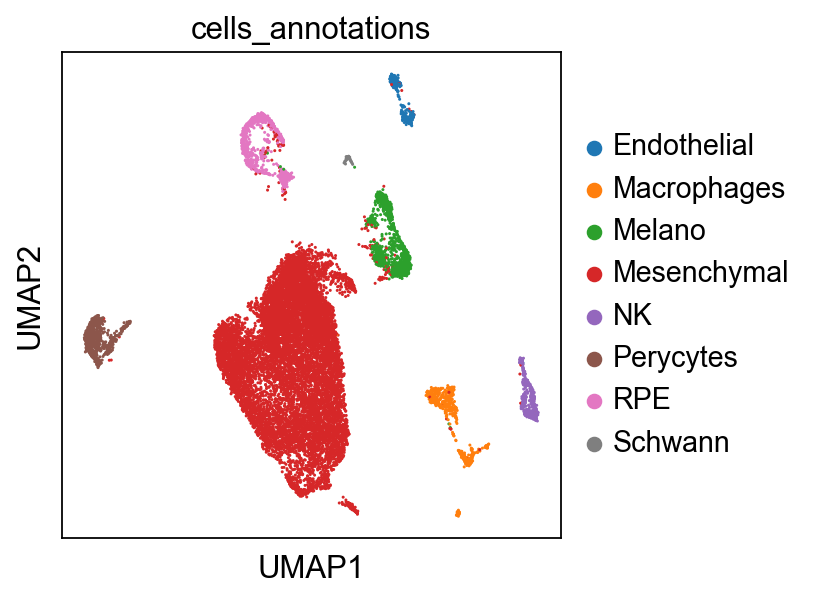

In [21]:
sc.pl.umap(adata_genes,color= 'cells_annotations')

In [22]:
#adata_genes=adata_genes.raw.to_adata()

In [23]:
adata_genes.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,log10GenesPerUMI,RNA_snn_res.0.8,seurat_clusters,pANN_0.25_0.09_1221,DF.classifications_0.25_0.09_1221,RNA_snn_res.0.1,celltype_new,UMAP_1,UMAP_2,cells_annotations
AAACCTGAGCAAATCA-1,RDS,6767,2627,3.339737,0.892717,8,NaN,0.303247,Singlet,1,Melano,6.593290,3.686160,Melano
AAACCTGAGCTAAACA-1,RDS,5172,2091,3.480278,0.894092,6,NaN,0.306113,Singlet,3,Perycytes,-12.885506,-0.412717,Perycytes
AAACCTGAGCTCCTCT-1,RDS,4953,1953,2.463154,0.890614,2,NaN,0.033429,Singlet,0,Mesenchymal,-3.449479,-3.215490,Mesenchymal
AAACCTGAGGTAAACT-1,RDS,4340,1827,1.198157,0.896700,0,NaN,0.298472,Singlet,0,Mesenchymal,-0.162593,1.430963,Mesenchymal
AAACCTGAGTCTCCTC-1,RDS,5654,2153,1.078882,0.888254,0,NaN,0.171442,Singlet,0,Mesenchymal,1.629165,0.150657,Mesenchymal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCACGTTC-1,RDS,1662,864,3.369434,0.911782,17,NaN,0.041070,Singlet,0,Mesenchymal,2.092599,3.134039,Mesenchymal
TTTGTCATCGCGCCAA-1,RDS,10898,3479,0.339512,0.877174,6,NaN,0.337154,Singlet,3,Perycytes,-12.112808,-0.751263,Perycytes
TTTGTCATCGGAAACG-1,RDS,5560,2123,0.881295,0.888353,5,NaN,0.110315,Singlet,0,Mesenchymal,-1.541526,-0.757671,Mesenchymal
TTTGTCATCTTGACGA-1,RDS,4152,1746,4.455684,0.896024,1,NaN,0.210602,Singlet,0,Mesenchymal,0.516932,-3.355764,Mesenchymal


In [24]:
auc_mtx

,2610021A01Rik(+),Aebp2(+),Ahdc1(+),Ahr(+),Alx3(+),Alx4(+),Arid3a(+),Arid5b(+),Arnt(+),Arntl(+),...,Zfp91(+),Zfp93(+),Zfp947(+),Zfp955a(+),Zfp991(+),Zik1(+),Zkscan7(+),Zscan2(+),Zscan21(+),Zxdc(+)
AAACCTGAGCAAATCA-1,0.021595,0.000000,0.000000,0.0,0.000000,0.015086,0.045511,0.039774,0.012897,0.0,...,0.045772,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.018593,0.000000
AAACCTGAGCGTTTAC-1,0.001997,0.014216,0.024573,0.0,0.008559,0.017021,0.047260,0.041979,0.011846,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.074721,0.001140,0.041814,0.007805
AAACCTGAGCTAAACA-1,0.007526,0.000000,0.000000,0.0,0.061883,0.038490,0.019659,0.080631,0.008418,0.0,...,0.000000,0.164359,0.049916,0.014269,0.0,0.00000,0.000000,0.103090,0.020647,0.011970
AAACCTGAGCTCCTCT-1,0.000000,0.000823,0.012530,0.0,0.061297,0.049828,0.031539,0.082964,0.036703,0.0,...,0.038322,0.183046,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.008105,0.000000
AAACCTGAGCTTTGGT-1,0.040701,0.015261,0.008028,0.0,0.000000,0.027690,0.027037,0.071798,0.019441,0.0,...,0.019727,0.100642,0.002702,0.000000,0.0,0.00000,0.116261,0.000000,0.010570,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCACGTTC-1,0.071183,0.008834,0.020494,0.0,0.021783,0.039777,0.034350,0.096122,0.079279,0.0,...,0.000000,0.000000,0.054238,0.057666,0.0,0.02381,0.008105,0.000000,0.009967,0.000000
TTTGTCATCGCGCCAA-1,0.010334,0.011525,0.026150,0.0,0.040980,0.037508,0.023965,0.089307,0.021223,0.0,...,0.000656,0.178206,0.015941,0.000000,0.0,0.00000,0.073961,0.000000,0.000000,0.017299
TTTGTCATCGGAAACG-1,0.031090,0.000000,0.027856,0.0,0.038874,0.029260,0.036229,0.089829,0.035629,0.0,...,0.000000,0.110661,0.000000,0.015451,0.0,0.00000,0.000000,0.000000,0.003149,0.000000
TTTGTCATCTTGACGA-1,0.027327,0.018459,0.028946,0.0,0.084946,0.042938,0.022085,0.086881,0.029671,0.0,...,0.022230,0.110098,0.034178,0.000000,0.0,0.00000,0.184397,0.084980,0.000000,0.000000


In [25]:
common_indices = adata_genes.obs.index.intersection(auc_mtx.index)

In [26]:
adata_genes.obs = adata_genes.obs.loc[common_indices]
auc_mtx_subset = auc_mtx.loc[common_indices]

In [27]:
adata_genes.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,log10GenesPerUMI,RNA_snn_res.0.8,seurat_clusters,pANN_0.25_0.09_1221,DF.classifications_0.25_0.09_1221,RNA_snn_res.0.1,celltype_new,UMAP_1,UMAP_2,cells_annotations
AAACCTGAGCAAATCA-1,RDS,6767,2627,3.339737,0.892717,8,NaN,0.303247,Singlet,1,Melano,6.593290,3.686160,Melano
AAACCTGAGCTAAACA-1,RDS,5172,2091,3.480278,0.894092,6,NaN,0.306113,Singlet,3,Perycytes,-12.885506,-0.412717,Perycytes
AAACCTGAGCTCCTCT-1,RDS,4953,1953,2.463154,0.890614,2,NaN,0.033429,Singlet,0,Mesenchymal,-3.449479,-3.215490,Mesenchymal
AAACCTGAGGTAAACT-1,RDS,4340,1827,1.198157,0.896700,0,NaN,0.298472,Singlet,0,Mesenchymal,-0.162593,1.430963,Mesenchymal
AAACCTGAGTCTCCTC-1,RDS,5654,2153,1.078882,0.888254,0,NaN,0.171442,Singlet,0,Mesenchymal,1.629165,0.150657,Mesenchymal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCACGTTC-1,RDS,1662,864,3.369434,0.911782,17,NaN,0.041070,Singlet,0,Mesenchymal,2.092599,3.134039,Mesenchymal
TTTGTCATCGCGCCAA-1,RDS,10898,3479,0.339512,0.877174,6,NaN,0.337154,Singlet,3,Perycytes,-12.112808,-0.751263,Perycytes
TTTGTCATCGGAAACG-1,RDS,5560,2123,0.881295,0.888353,5,NaN,0.110315,Singlet,0,Mesenchymal,-1.541526,-0.757671,Mesenchymal
TTTGTCATCTTGACGA-1,RDS,4152,1746,4.455684,0.896024,1,NaN,0.210602,Singlet,0,Mesenchymal,0.516932,-3.355764,Mesenchymal


In [28]:
auc_mtx_subset

,2610021A01Rik(+),Aebp2(+),Ahdc1(+),Ahr(+),Alx3(+),Alx4(+),Arid3a(+),Arid5b(+),Arnt(+),Arntl(+),...,Zfp91(+),Zfp93(+),Zfp947(+),Zfp955a(+),Zfp991(+),Zik1(+),Zkscan7(+),Zscan2(+),Zscan21(+),Zxdc(+)
AAACCTGAGCAAATCA-1,0.021595,0.000000,0.000000,0.0,0.000000,0.015086,0.045511,0.039774,0.012897,0.0,...,0.045772,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.018593,0.000000
AAACCTGAGCTAAACA-1,0.007526,0.000000,0.000000,0.0,0.061883,0.038490,0.019659,0.080631,0.008418,0.0,...,0.000000,0.164359,0.049916,0.014269,0.0,0.00000,0.000000,0.103090,0.020647,0.011970
AAACCTGAGCTCCTCT-1,0.000000,0.000823,0.012530,0.0,0.061297,0.049828,0.031539,0.082964,0.036703,0.0,...,0.038322,0.183046,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.008105,0.000000
AAACCTGAGGTAAACT-1,0.007092,0.018427,0.010901,0.0,0.034261,0.025299,0.028941,0.118033,0.020347,0.0,...,0.018356,0.109648,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.009420,0.000000
AAACCTGAGTCTCCTC-1,0.022753,0.000000,0.003642,0.0,0.003040,0.044255,0.037896,0.102936,0.019258,0.0,...,0.032898,0.100642,0.000000,0.000000,0.0,0.00000,0.060537,0.000000,0.004902,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCACGTTC-1,0.071183,0.008834,0.020494,0.0,0.021783,0.039777,0.034350,0.096122,0.079279,0.0,...,0.000000,0.000000,0.054238,0.057666,0.0,0.02381,0.008105,0.000000,0.009967,0.000000
TTTGTCATCGCGCCAA-1,0.010334,0.011525,0.026150,0.0,0.040980,0.037508,0.023965,0.089307,0.021223,0.0,...,0.000656,0.178206,0.015941,0.000000,0.0,0.00000,0.073961,0.000000,0.000000,0.017299
TTTGTCATCGGAAACG-1,0.031090,0.000000,0.027856,0.0,0.038874,0.029260,0.036229,0.089829,0.035629,0.0,...,0.000000,0.110661,0.000000,0.015451,0.0,0.00000,0.000000,0.000000,0.003149,0.000000
TTTGTCATCTTGACGA-1,0.027327,0.018459,0.028946,0.0,0.084946,0.042938,0.022085,0.086881,0.029671,0.0,...,0.022230,0.110098,0.034178,0.000000,0.0,0.00000,0.184397,0.084980,0.000000,0.000000


In [29]:
adata=sc.AnnData(auc_mtx_subset,
           obs=adata_genes.obs,uns=adata_genes.uns,obsm=adata_genes.obsm)

/tmp/ipykernel_7059/2861203821.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=sc.AnnData(auc_mtx_subset,


In [32]:
adata

AnnData object with n_obs × n_vars = 16227 × 387
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'log10GenesPerUMI', 'RNA_snn_res.0.8', 'seurat_clusters', 'pANN_0.25_0.09_1221', 'DF.classifications_0.25_0.09_1221', 'RNA_snn_res.0.1', 'celltype_new', 'UMAP_1', 'UMAP_2', 'cells_annotations'
    uns: 'cells_annotations_colors'
    obsm: 'X_pca', 'X_umap'

In [34]:
adata.write_h5ad('umap_regulons_all_clusters.h5ad')

In [58]:
adata=sc.read_h5ad('umap_regulons_all_clusters.h5ad')

In [112]:
adata.obs.cells_annotations

AAACCTGAGCAAATCA-1         Melano
AAACCTGAGCTAAACA-1      Perycytes
AAACCTGAGCTCCTCT-1    Mesenchymal
AAACCTGAGGTAAACT-1    Mesenchymal
AAACCTGAGTCTCCTC-1    Mesenchymal
                         ...     
TTTGTCATCCACGTTC-1    Mesenchymal
TTTGTCATCGCGCCAA-1      Perycytes
TTTGTCATCGGAAACG-1    Mesenchymal
TTTGTCATCTTGACGA-1    Mesenchymal
TTTGTCATCTTGCCGT-1    Mesenchymal
Name: cells_annotations, Length: 16227, dtype: category
Categories (8, object): ['Endothelial', 'Macrophages', 'Melano', 'Mesenchymal', 'NK', 'Perycytes', 'RPE', 'Schwann']

In [59]:
adata.obs['cells_annotations'].unique()

['Melano', 'Perycytes', 'Mesenchymal', 'NK', 'Macrophages', 'Endothelial', 'RPE', 'Schwann']
Categories (8, object): ['Endothelial', 'Macrophages', 'Melano', 'Mesenchymal', 'NK', 'Perycytes', 'RPE', 'Schwann']

In [73]:
cells = adata[adata.obs['cells_annotations'] == cell_type]

In [74]:
cells

View of AnnData object with n_obs × n_vars = 62 × 387
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'log10GenesPerUMI', 'RNA_snn_res.0.8', 'seurat_clusters', 'pANN_0.25_0.09_1221', 'DF.classifications_0.25_0.09_1221', 'RNA_snn_res.0.1', 'celltype_new', 'UMAP_1', 'UMAP_2', 'cells_annotations'
    uns: 'cells_annotations_colors'
    obsm: 'X_pca', 'X_umap'

In [60]:

# Assuming cell types are stored in the 'cells_annotations' column
cell_types = adata.obs['cells_annotations'].unique()

# Create a list to store the DataFrames
df_list = []

# Extract genes for each cell type
for cell_type in cell_types:
    # Select cells of the current cell type
    cells = adata[adata.obs['cells_annotations'] == cell_type]
    
    # Get the expression data and convert to dense format
    gene_expression = pd.DataFrame(cells.X.toarray(), index=cells.obs_names, columns=cells.var_names)
    
    # Add a column for the cell type
    gene_expression['cell_type'] = cell_type
    
    # Append to the list of DataFrames
    df_list.append(gene_expression)

# Concatenate all the DataFrames into a single DataFrame
combined_df = pd.concat(df_list)

# Reset the index
combined_df.reset_index(inplace=True)

# Rename the index column to 'cell_id'
combined_df.rename(columns={'index': 'cell_id'}, inplace=True)

# Save the combined DataFrame to a CSV file if needed
combined_df.to_csv("genes_per_cell_type.csv", index=False)

# Example: print the first few rows of the combined DataFrame
print(combined_df.head())


              cell_id  2610021A01Rik(+)  Aebp2(+)  Ahdc1(+)  Ahr(+)   Alx3(+)  \
0  AAACCTGAGCAAATCA-1          0.021595  0.000000  0.000000     0.0  0.000000   
1  AAACCTGCAGACACTT-1          0.029961  0.042743  0.001898     0.0  0.000000   
2  AAACGGGGTGCCTTGG-1          0.022869  0.044295  0.001847     0.0  0.000000   
3  AAACGGGTCAGCTGGC-1          0.006687  0.006586  0.007477     0.0  0.000000   
4  AAACGGGTCAGGCCCA-1          0.034795  0.019409  0.010452     0.0  0.019917   

    Alx4(+)  Arid3a(+)  Arid5b(+)   Arnt(+)  ...  Zfp93(+)  Zfp947(+)  \
0  0.015086   0.045511   0.039774  0.012897  ...  0.000000    0.00000   
1  0.026687   0.044833   0.054670  0.016767  ...  0.000000    0.05255   
2  0.011712   0.027903   0.032161  0.018077  ...  0.000000    0.00000   
3  0.001236   0.043640   0.038012  0.006323  ...  0.000000    0.00000   
4  0.024387   0.042226   0.079635  0.029816  ...  0.102781    0.00000   

   Zfp955a(+)  Zfp991(+)  Zik1(+)  Zkscan7(+)  Zscan2(+)  Zscan21(+)  \
0 

In [61]:
combined_df

,cell_id,2610021A01Rik(+),Aebp2(+),Ahdc1(+),Ahr(+),Alx3(+),Alx4(+),Arid3a(+),Arid5b(+),Arnt(+),...,Zfp93(+),Zfp947(+),Zfp955a(+),Zfp991(+),Zik1(+),Zkscan7(+),Zscan2(+),Zscan21(+),Zxdc(+),cell_type
0,AAACCTGAGCAAATCA-1,0.021595,0.000000,0.000000,0.0,0.000000,0.015086,0.045511,0.039774,0.012897,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.018593,0.000000,Melano
1,AAACCTGCAGACACTT-1,0.029961,0.042743,0.001898,0.0,0.000000,0.026687,0.044833,0.054670,0.016767,...,0.000000,0.052550,0.000000,0.0,0.0,0.000000,0.000000,0.013418,0.000000,Melano
2,AAACGGGGTGCCTTGG-1,0.022869,0.044295,0.001847,0.0,0.000000,0.011712,0.027903,0.032161,0.018077,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.026589,0.019475,Melano
3,AAACGGGTCAGCTGGC-1,0.006687,0.006586,0.007477,0.0,0.000000,0.001236,0.043640,0.038012,0.006323,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.003724,0.000000,Melano
4,AAACGGGTCAGGCCCA-1,0.034795,0.019409,0.010452,0.0,0.019917,0.024387,0.042226,0.079635,0.029816,...,0.102781,0.000000,0.000000,0.0,0.0,0.000000,0.095871,0.013418,0.000000,Melano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16222,TGCCCTACAAGCGCTC-1,0.022579,0.000000,0.021649,0.0,0.003306,0.026444,0.055741,0.084195,0.032863,...,0.110211,0.016008,0.000000,0.0,0.0,0.099291,0.000000,0.000000,0.000113,Schwann
16223,TGCGTGGCAGCATGAG-1,0.000000,0.000000,0.011055,0.0,0.048846,0.019007,0.062375,0.040283,0.018260,...,0.109873,0.000000,0.000000,0.0,0.0,0.062057,0.000000,0.026370,0.004128,Schwann
16224,TTAGTTCAGAGGTTGC-1,0.008569,0.030205,0.008631,0.0,0.014264,0.023597,0.053796,0.076473,0.025954,...,0.109760,0.000000,0.000000,0.0,0.0,0.105623,0.000000,0.005340,0.000000,Schwann
16225,TTATGCTAGTTGAGAT-1,0.019221,0.020707,0.001667,0.0,0.042953,0.021560,0.044669,0.061912,0.024705,...,0.110773,0.000000,0.063154,0.0,0.0,0.000000,0.000000,0.000000,0.011783,Schwann


In [67]:
#melano_df = combined_df[combined_df['cell_type'] == 'Melano']
melano_df
#melano_df=melano_df.iloc[: , 1:]
melano_df = melano_df.iloc[:, :-1]

In [70]:
melano_df

,2610021A01Rik(+),Aebp2(+),Ahdc1(+),Ahr(+),Alx3(+),Alx4(+),Arid3a(+),Arid5b(+),Arnt(+),Arntl(+),...,Zfp91(+),Zfp93(+),Zfp947(+),Zfp955a(+),Zfp991(+),Zik1(+),Zkscan7(+),Zscan2(+),Zscan21(+),Zxdc(+)
0,0.021595,0.000000,0.000000,0.0,0.000000,0.015086,0.045511,0.039774,0.012897,0.0,...,0.045771,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.018593,0.000000
1,0.029961,0.042743,0.001898,0.0,0.000000,0.026687,0.044833,0.054670,0.016767,0.0,...,0.059181,0.000000,0.052550,0.000000,0.0,0.000000,0.000000,0.000000,0.013418,0.000000
2,0.022869,0.044295,0.001847,0.0,0.000000,0.011712,0.027903,0.032161,0.018077,0.0,...,0.022111,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.026589,0.019475
3,0.006687,0.006586,0.007477,0.0,0.000000,0.001236,0.043640,0.038012,0.006323,0.0,...,0.041600,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.003724,0.000000
4,0.034795,0.019409,0.010452,0.0,0.019917,0.024387,0.042226,0.079635,0.029816,0.0,...,0.022469,0.102781,0.000000,0.000000,0.0,0.000000,0.000000,0.095871,0.013418,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0.022435,0.051102,0.018635,0.0,0.000107,0.027994,0.049466,0.066166,0.031797,0.0,...,0.000000,0.139818,0.000000,0.057244,0.0,0.000000,0.000000,0.000000,0.009228,0.000000
1050,0.023477,0.038754,0.000000,0.0,0.020663,0.040091,0.035551,0.057926,0.062306,0.0,...,0.010847,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.005696,0.046831
1051,0.007642,0.015831,0.005027,0.0,0.003706,0.018571,0.053567,0.051813,0.010558,0.0,...,0.003040,0.040077,0.000000,0.000000,0.0,0.000000,0.084347,0.002280,0.005860,0.018988
1052,0.015661,0.000000,0.006925,0.0,0.000000,0.018116,0.045372,0.040421,0.010657,0.0,...,0.037070,0.000000,0.000000,0.000000,0.0,0.000000,0.101570,0.031282,0.009036,0.003978


In [ ]:

# Remove columns that consist entirely of zeros
melano_df = melano_df.loc[:, (melano_df != 0).any(axis=0)]

# Extract the row indices (assuming these are the cell IDs)
cell_ids = df.index.astype(str).tolist()

# Putting the row names in quotes
quoted_cell_ids = [f'"{cell_id}"' for cell_id in cell_ids]

# Printing the list of quoted cell IDs
print(quoted_cell_ids)

# Example: print the first few rows of the modified DataFrame
print(df.head())

In [71]:
melano_df = melano_df.loc[:, (melano_df != 0).any(axis=0)]

In [72]:
melano_df

,2610021A01Rik(+),Aebp2(+),Ahdc1(+),Ahr(+),Alx3(+),Alx4(+),Arid3a(+),Arid5b(+),Arnt(+),Arntl(+),...,Zfp91(+),Zfp93(+),Zfp947(+),Zfp955a(+),Zfp991(+),Zik1(+),Zkscan7(+),Zscan2(+),Zscan21(+),Zxdc(+)
0,0.021595,0.000000,0.000000,0.0,0.000000,0.015086,0.045511,0.039774,0.012897,0.0,...,0.045771,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.018593,0.000000
1,0.029961,0.042743,0.001898,0.0,0.000000,0.026687,0.044833,0.054670,0.016767,0.0,...,0.059181,0.000000,0.052550,0.000000,0.0,0.000000,0.000000,0.000000,0.013418,0.000000
2,0.022869,0.044295,0.001847,0.0,0.000000,0.011712,0.027903,0.032161,0.018077,0.0,...,0.022111,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.026589,0.019475
3,0.006687,0.006586,0.007477,0.0,0.000000,0.001236,0.043640,0.038012,0.006323,0.0,...,0.041600,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.003724,0.000000
4,0.034795,0.019409,0.010452,0.0,0.019917,0.024387,0.042226,0.079635,0.029816,0.0,...,0.022469,0.102781,0.000000,0.000000,0.0,0.000000,0.000000,0.095871,0.013418,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0.022435,0.051102,0.018635,0.0,0.000107,0.027994,0.049466,0.066166,0.031797,0.0,...,0.000000,0.139818,0.000000,0.057244,0.0,0.000000,0.000000,0.000000,0.009228,0.000000
1050,0.023477,0.038754,0.000000,0.0,0.020663,0.040091,0.035551,0.057926,0.062306,0.0,...,0.010847,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.005696,0.046831
1051,0.007642,0.015831,0.005027,0.0,0.003706,0.018571,0.053567,0.051813,0.010558,0.0,...,0.003040,0.040077,0.000000,0.000000,0.0,0.000000,0.084347,0.002280,0.005860,0.018988
1052,0.015661,0.000000,0.006925,0.0,0.000000,0.018116,0.045372,0.040421,0.010657,0.0,...,0.037070,0.000000,0.000000,0.000000,0.0,0.000000,0.101570,0.031282,0.009036,0.003978


In [42]:
# Check the available annotations
print(adata.obs.columns)


Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'log10GenesPerUMI', 'RNA_snn_res.0.8', 'seurat_clusters',
       'pANN_0.25_0.09_1221', 'DF.classifications_0.25_0.09_1221',
       'RNA_snn_res.0.1', 'celltype_new', 'UMAP_1', 'UMAP_2',
       'cells_annotations'],
      dtype='object')


In [44]:
# Assuming cell types are stored in the 'celltype_new' column
cell_types = adata.obs['cells_annotations'].unique()

In [45]:
cell_types

['Melano', 'Perycytes', 'Mesenchymal', 'NK', 'Macrophages', 'Endothelial', 'RPE', 'Schwann']
Categories (8, object): ['Endothelial', 'Macrophages', 'Melano', 'Mesenchymal', 'NK', 'Perycytes', 'RPE', 'Schwann']

In [43]:

# Assuming cell types are stored in the 'celltype_new' column
cell_types = adata.obs['cells_annotations'].unique()

# Create a dictionary to store genes per cell type
genes_per_cell_type = {}

# Extract genes for each cell type
for cell_type in cell_types:
    # Select cells of the current cell type
    cells = adata[adata.obs['cells_annotations'] == cell_type]
    
    # Get the expression data
    gene_expression = pd.DataFrame(cells.X, index=cells.obs_names, columns=cells.var_names)
    
    # Store in dictionary
    genes_per_cell_type[cell_type] = gene_expression

# Now, genes_per_cell_type is a dictionary with cell type names as keys and gene expression DataFrames as values
# Optionally, you can save each DataFrame to a CSV file or perform further analysis

# Example: Save each DataFrame to a CSV file
for cell_type, df in genes_per_cell_type.items():
    df.to_csv(f"{cell_type}_genes.csv")


In [92]:
reg=adata.var_names

In [93]:
all_reg=reg.to_list()

In [94]:
all_reg

['2610021A01Rik(+)',
 'Aebp2(+)',
 'Ahdc1(+)',
 'Ahr(+)',
 'Alx3(+)',
 'Alx4(+)',
 'Arid3a(+)',
 'Arid5b(+)',
 'Arnt(+)',
 'Arntl(+)',
 'Ascl1(+)',
 'Atf1(+)',
 'Atf2(+)',
 'Atf3(+)',
 'Atf4(+)',
 'Atf7(+)',
 'Bach1(+)',
 'Bach2(+)',
 'Batf(+)',
 'Batf3(+)',
 'Bcl11b(+)',
 'Bcl3(+)',
 'Bcl6(+)',
 'Bcl6b(+)',
 'Bclaf1(+)',
 'Bhlha15(+)',
 'Bhlhe41(+)',
 'Bptf(+)',
 'Cebpa(+)',
 'Cebpb(+)',
 'Cebpd(+)',
 'Cebpe(+)',
 'Cebpg(+)',
 'Chd1(+)',
 'Clock(+)',
 'Creb3(+)',
 'Creb3l1(+)',
 'Creb3l2(+)',
 'Crem(+)',
 'Crx(+)',
 'Ctcf(+)',
 'Cux1(+)',
 'Cux2(+)',
 'Dbp(+)',
 'Dlx5(+)',
 'Dmrta1(+)',
 'E2f1(+)',
 'E2f3(+)',
 'E2f5(+)',
 'E2f6(+)',
 'E2f7(+)',
 'E2f8(+)',
 'E4f1(+)',
 'Ebf1(+)',
 'Ebf2(+)',
 'Ebf3(+)',
 'Egr1(+)',
 'Egr2(+)',
 'Egr3(+)',
 'Ehf(+)',
 'Elf1(+)',
 'Elf2(+)',
 'Elf3(+)',
 'Elf4(+)',
 'Elk1(+)',
 'Elk3(+)',
 'Elk4(+)',
 'Emx2(+)',
 'Eomes(+)',
 'Ep300(+)',
 'Erf(+)',
 'Erg(+)',
 'Ets1(+)',
 'Ets2(+)',
 'Etv1(+)',
 'Etv3(+)',
 'Etv4(+)',
 'Etv5(+)',
 'Etv6(+)',
 'Fev(+)',

In [95]:
import scanpy as sc
import matplotlib.pyplot as plt
import math

### working

/tmp/ipykernel_16404/3502699453.py:29: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['cells_annotations'].cat.reorder_categories(desired_order, inplace=True)
/home/julia/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


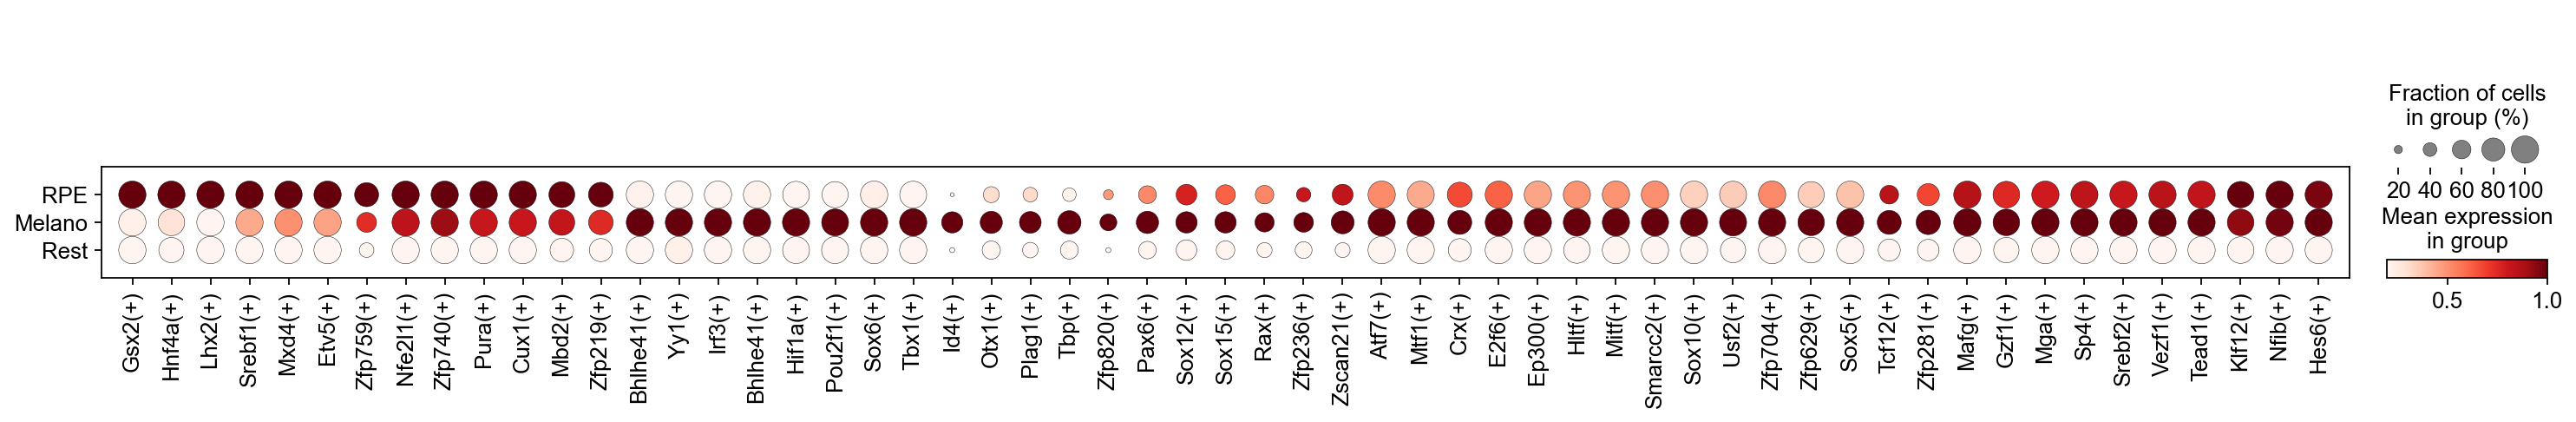

In [129]:
import scanpy as sc

# Load your dataset (replace this with your own data loading step)
#adata = sc.datasets.pbmc3k()

# List of regulons to plot
f = ['Gsx2(+)', 'Hnf4a(+)', 'Lhx2(+)',
     'Srebf1(+)','Mxd4(+)', 'Etv5(+)', 'Zfp759(+)', 'Nfe2l1(+)','Zfp740(+)', 'Pura(+)', 'Cux1(+)', 'Mbd2(+)','Zfp219(+)',  
    'Bhlhe41(+)', 'Yy1(+)','Irf3(+)', 'Bhlhe41(+)','Hif1a(+)', 'Pou2f1(+)','Sox6(+)', 'Tbx1(+)', 'Id4(+)', 'Otx1(+)', 'Plag1(+)', 'Tbp(+)', 
     
  'Zfp820(+)',  'Pax6(+)','Sox12(+)', 'Sox15(+)', 
    'Rax(+)',  'Zfp236(+)','Zscan21(+)',  'Atf7(+)', 'Mtf1(+)', 
    'Crx(+)',  'E2f6(+)', 'Ep300(+)', 'Hltf(+)',  'Mitf(+)', 
      'Smarcc2(+)', 'Sox10(+)', 
    'Usf2(+)',  'Zfp704(+)', 'Zfp629(+)', 
    'Sox5(+)',    'Tcf12(+)', 
    'Zfp281(+)','Mafg(+)',   'Gzf1(+)',   'Mga(+)','Sp4(+)',  'Srebf2(+)','Vezf1(+)','Tead1(+)', 
      'Klf12(+)', 'Nfib(+)','Hes6(+)',
]

# Specify the desired order of cell annotations
desired_order = [
    'RPE', 'Melano', 'Rest', # replace with your actual annotations
    # Add all the annotations you have in the desired order
]

# Reorder the categories of cells_annotations
adata.obs['cells_annotations'] = adata.obs['cells_annotations'].astype('category')
adata.obs['cells_annotations'].cat.reorder_categories(desired_order, inplace=True)

# Create the dot plot with the reordered annotations
sc.pl.dotplot(
    adata, f, groupby='cells_annotations', standard_scale="var", mean_only_expressed=True, vmin=0.2, save='05_07_dor_reg.pdf'
   # save='RPE_mel_dot.pdf'
)


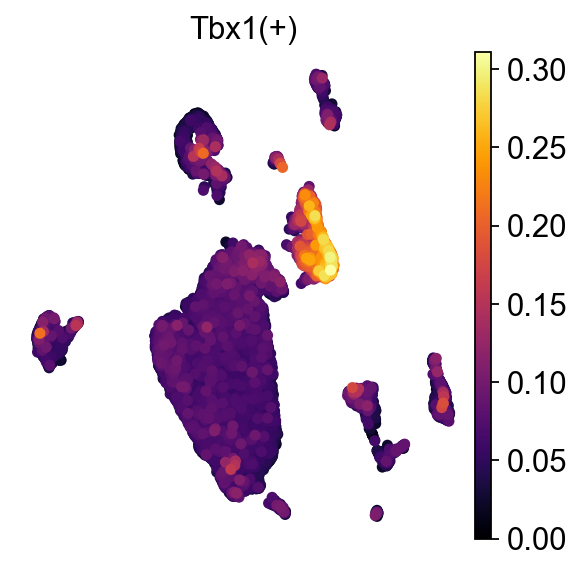

In [141]:
sc.pl.umap(adata, color= 'Tbx1(+)', frameon=False, cmap='inferno', size=100, save='Tbx1.svg')

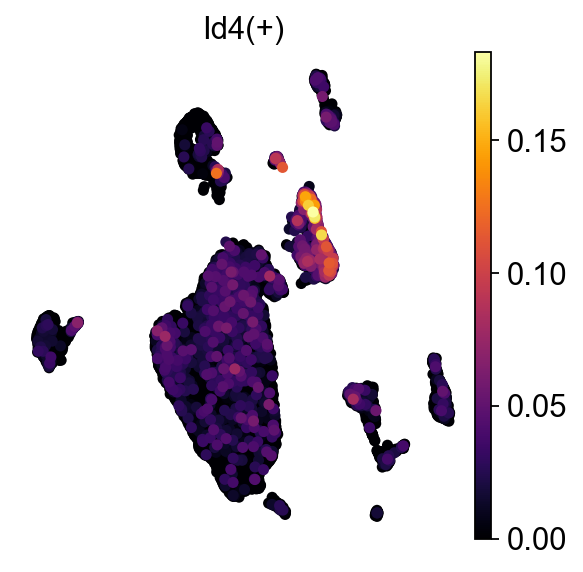

In [142]:
sc.pl.umap(adata, color='Id4(+)', frameon=False, cmap='inferno', size=100, save='Id4.svg')

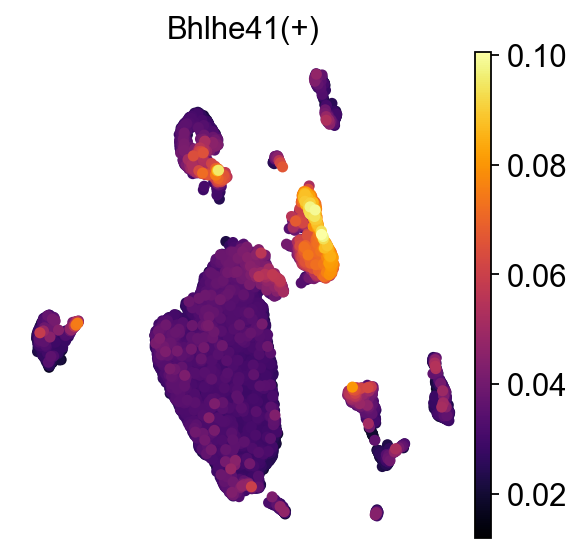

In [124]:
sc.pl.umap(adata, color='Bhlhe41(+)', frameon=False, cmap='inferno', size=100, save='Bhlhe41.svg')